# The Monty Hall Problem

## Introduction

The Monty Hall problem is a famous little puzzle from a game show. It goes like this: you are presented with 3 doors. Behind two are goats and behind the third is a car. You are asked to select a door; if you select the door with the car, you win! After selecting, the host then opens one of the remaining two doors, revealing a goat. The host then asks if you would like to switch doors or stick with your original choice. What would you do? Does it matter?

<img src="images/Image_58_MontyHall.png">

## Objectives

You will be able to:
* Solve the monty hall problem using simulations

## Run a Simulation

This is not a traditional application of Bayes' Theorem, so trying to formulate the problem as such is tricky at best. That said, the scenario does capture the motivating conception behind Bayesian statistics: updating our beliefs in the face of additional evidence. With this, you'll employ another frequently used tool of Bayesian's&mdash;running a simulation. To do this, generate a random integer between one and three to represent the door hiding the car. Then, generate a second integer between one and three representing the player's selection. Then, of those the contestant did not choose, select a door concealing a goat to reveal. Record the results of the simulated game if they changed versus if they did not. Repeat this process a thousand (or more) times. Finally, plot the results of your simulation as a line graph. The x-axis should be the number of simulations, and the y-axis should be the probability of winning. (There should be two lines on the graph, one for switching doors, and the other for keeping the original selection.)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
np.random.seed(123)

total simulations:  10000


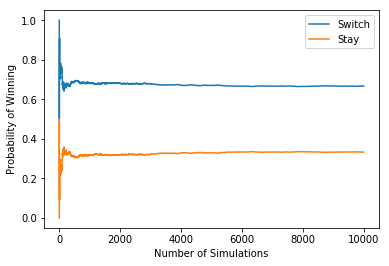

In [3]:
#Your code here
choices = [1,2,3]

num_sim = 0
stay_win = []
switch_win = []

for i in range(10000):
    num_sim += 1
    car = np.random.choice(choices)
    selection = np.random.choice(choices)
    
    if car == selection:
        stay_win.append(1)
        switch_win.append(0)
    else:
        switch_win.append(1)
        stay_win.append(0)


print('total simulations: ',num_sim)

plt.plot(range(1,num_sim+1), [np.mean(switch_win[:i]) for i in range(1,num_sim+1)], label='Switch')
plt.plot(range(1,num_sim+1), [np.mean(stay_win[:i]) for i in range(1,num_sim+1)], label='Stay')
plt.legend()
plt.xlabel('Number of Simulations')
plt.ylabel('Probability of Winning')
plt.show()

In [4]:
print('Probability of winning if stay:', np.mean(stay_win))
print('Probability of winning if switch:', np.mean(switch_win))

Probability of winning if stay: 0.333
Probability of winning if switch: 0.667


Simulated Probabilities:
Chance of Winning Keeping Selected Door:  0.3318
Chance of Winning Switching Selected Door:  0.6682


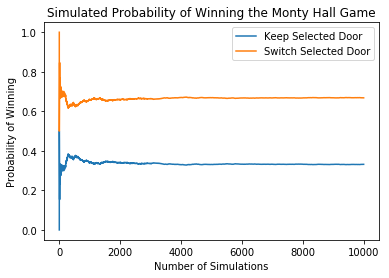

In [5]:
# OR
stay = []
switch = []
for i in range(10**4):
    car_door = np.random.randint(1,4)
    contestant_selection = np.random.randint(1,4)
    remaining_goats = [door for door in [1,2,3] if door!=car_door and door !=contestant_selection]
    door_revealed = np.random.choice(remaining_goats)
    if_switch = [door for door in [1,2,3] if door != contestant_selection and door != door_revealed][0]
    #Record results if contestant changes door selection
    if if_switch == car_door:
        switch.append(1)
    else:
        switch.append(0)
    #Record results if contestant keep door selection
    if contestant_selection == car_door:
        stay.append(1)
    else:
        stay.append(0)
#Plot the results
plt.plot(range(1,10**4+1), [np.mean(stay[:i]) for i in range(1,10**4+1)], label='Keep Selected Door')
plt.plot(range(1,10**4+1), [np.mean(switch[:i]) for i in range(1,10**4+1)], label='Switch Selected Door')
plt.ylabel('Probability of Winning')
plt.xlabel('Number of Simulations')
plt.title('Simulated Probability of Winning the Monty Hall Game')
plt.legend()
print('Simulated Probabilities:')
print('Chance of Winning Keeping Selected Door: ', np.mean(stay))
print('Chance of Winning Switching Selected Door: ', np.mean(switch))

## Summary

In this lab you further investigated the idea of Bayes' Theorem and Bayesian statistics in general through the Monty Hall problem. Hopefully this was an entertaining little experience! 